In [2]:
import numpy as np
import pandas as pd

In [3]:
# Maize is corn
# Water Intensity
# Approximate seasonal values 
# Information from fao, Food And Agriculture Organisation of the United Nations
# http://www.fao.org/3/S2022E/s2022e02.htm, Section 2.4, as of 01-Oct-2020
water = pd.DataFrame({"Rice": (450, 700), "Maize": (500, 800), "Potato": (500, 700), 
                      "Wheat": (450, 650)})

In [23]:
# Temperature
# Information from Climatic Requirements for Field Crops
# https://www.yourarticlelibrary.com/crops/climatic-requirements-for-field-crops/77211
# There are different temperature requirements at different stages of a crop 
# e.g. germination/growth/flowering/grain formation
# Taking the optimum temperatures for rice, maize & wheat growth & tuberization for potato
temp = pd.DataFrame({"Rice": (21, 36), "Maize": (30, 32), "Potato": (17, 20), 
                     "Wheat": (20, 25)})

In [88]:
# Area Plantation
# Here we will load a csv from fao for Production (tonnes) and Area Harvested (hectares, ha)
# From these 2 values, we can calculate average global yield = Production/Area Harvested
# for each of the 4 crops
raw = pd.read_csv("FAOSTAT_data_2018.csv")

pdn = pd.DataFrame(np.zeros([4, 3]))

pdnrow = ("Rice", "Maize", "Potato", "Wheat")
rawcol = ("Rice, paddy", "Maize", "Potatoes", "Wheat")
pdncol = ("Production", "Area", "Yield")

pdn.index = pdnrow
pdn.columns = pdncol
for x, y in zip(rawcol, pdnrow):
    p1 = raw[(raw.Element == "Production") & (raw.Item == x)]["Value"]
    a1 = raw[(raw.Element == "Area harvested") & (raw.Item == x)]["Value"]
    pdn.loc[y, "Production"] = int(p1/1000000)
    pdn.loc[y, "Area"] = int(a1/1000000)
    pdn.loc[y, "Yield"] = np.round(int(p1)/int(a1), 2)

In [6]:
# Global Consumption

In [7]:
# Calorie

In [8]:
#gs[3, :] is horizontal 2 across, from subplot 3,0 to 3,1
#gs[3:] would be vertical 3 down, from subplot 1,1 to 3,1

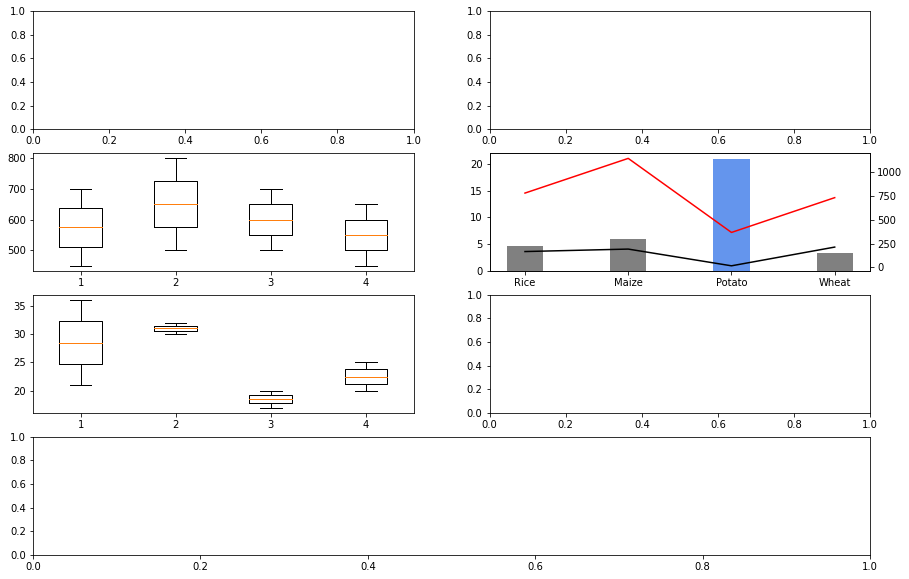

In [145]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 2, figsize = (15, 10))
gs = ax[3, 1].get_gridspec()
for subplot in ax[3]:
    subplot.remove()
axbig = fig.add_subplot(gs[3, :])

ax[1, 0].boxplot(water)
ax[2, 0].boxplot(temp)
ax2 = ax[1, 1].twinx()
ax[1, 1].bar((0, 1, 2, 3), pdn.Yield, width = 0.35, 
       color = ("grey", "grey", "cornflowerblue", "grey"))
ax2.plot(pdn.Production, c = "red")
ax2.plot(pdn.Area, c = "black")

plt.show()

#ax[1, 1].bar(x = pdn.Yield, height = 0.001, width = 0.02)
secaxy = ax[1, 1].secondary_yaxis('right')
#ax[1, 0].legend(loc = [1.1, 0.35]) 

fig.tight_layout()
plt.show()